In [99]:
import numpy as np
from iminuit import Minuit


In [100]:
import matplotlib.pylab as plt
data1 = np.random.normal(loc=20,scale=1, size=1000) # 1st gaussian
data2 = 30*np.random.random(size=1000) # uniform bkg
data3 = np.random.normal(loc=10, scale=10, size=1000) # 2nd gaussian

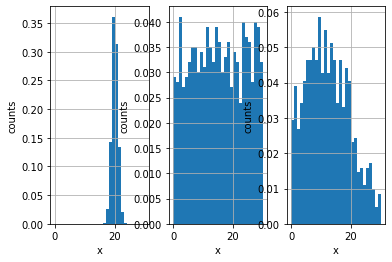

In [101]:
fig, axes = plt.subplots(1,3)
axes[0].grid()
signalPDF, bins, patch = axes[0].hist(data1, bins = 30, range=(0,30), density=True)
axes[0].set_xlabel("x")
axes[0].set_ylabel("counts")

bkgPDF, bins, patch = axes[1].hist(data2, bins = 30, range=(0,30), density=True)
axes[1].grid()
axes[1].set_xlabel("x")
axes[1].set_ylabel("counts")

bkgPDF2, bins, patch = axes[2].hist(data3, bins = 30, range=(0,30), density=True)
axes[2].grid()
axes[2].set_xlabel("x")
axes[2].set_ylabel("counts")

plt.show()
ntotal = 1000
nsig = 0.3 #signal
n1 =  0.4 #First background component.
#third is n2 = 1 - nsig - n1

data = ntotal * (nsig * signalPDF + (1 - nsig) * ( (n1* bkgPDF + (1 - n1)* bkgPDF2)))

[ 20.44273839  24.27031785  22.77584352  21.93652812  25.06376528
  28.47100244  29.31100244  30.85134474  27.91100244  34.16547677
  26.65066015  34.02513447  27.77066015  30.52479218  30.43100244
  24.45652812  28.21100244  30.90308068  71.46410758 132.80376528
 113.47550122  59.42894866  18.88136919  18.17481663  14.98102689
  16.75481663  15.02826406  15.30757946  12.97378973  12.55413203]


Text(0, 0.5, 'density')

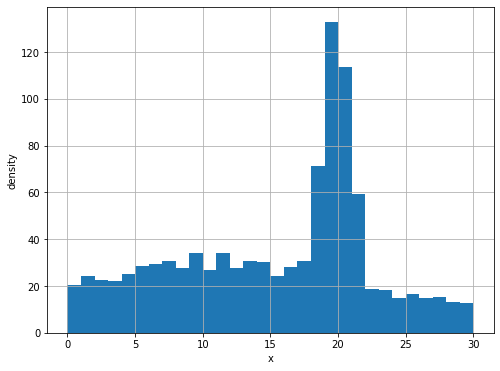

In [102]:
bin_width = np.diff(bins)[0]
bin_centers = bins[:-1] + bin_width/2.

print (data)
fig, ax = plt.subplots(figsize=(8,6))
ax.grid()
ax.bar(bin_centers, data,width=bin_width)
ax.set_xlabel("x")
ax.set_ylabel("density")

In [103]:
def evaluateLLH(pars):
    xi = pars[0]
    modelPDF = xi * signalPDF
    
    modelPDF += (1 - xi) * (pars[1]*bkgPDF + (1 - pars[1])*bkgPDF2)
    
    #Poisson likelihood
    values = data * np.log(modelPDF) - modelPDF        
    return -np.sum(values)

In [104]:
evaluateLLH([0.2, 0.2])

3193.5622415538933

In [105]:
kwds = dict()
kwds['errordef']=.5
#kwds['print_level']=0

values = [0., 0.]
fix = [False, False]
error = [0.1]
limit = [(-1,1), (-1, 1)]

m = Minuit.from_array_func(evaluateLLH, (0., 1) , limit=limit, name=["nsig", "n1"], **kwds)
m.migrad()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 3172                       │        Ncalls = 58 (58 total)        │
│ EDM = 1.18e-05 (Goal: 0.0001)    │               up = 0.5               │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ nsig │   0.300   │   0.018   │            │            │   -1    │    1    │       │
│ 1 │ n1   │   0.40    │   0.07    │            │            │   -1    │    1    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘